In [44]:
#ML_KMeans

In [45]:
#Perceptron is more or less similar to Logistic Regression. 

In [46]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [47]:
def euclidian_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    def __init__(self, k = 5, max_iters = 100, plot_steps = False):
        self.K = k
        self.iters = max_iters
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
        self.plot_steps = plot_steps
        
    def predict(self, X):
        
        #In this program we would be requiring X in various helper functions. That's why we made X an attribute of KMeans.
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [X[idx] for idx in random_sample_idxs]
        
        for _ in range(self.iters):
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self.is_converged(centroids_old, self.centroids):
                break
        return self._get_cluster_labels(self.clusters)
            
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [euclidian_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids
            
    def is_converged(self, old, new):
        distances = [euclidian_distance(old[i], new[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    def plot(self):
        fig, ax = plt.subplots(figsize = (12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker = 'x', color = 'black', linewidth = 2)
        plt.show()

In [48]:
X, y = datasets.make_blobs(centers = 4, n_samples = 500, n_features = 2, shuffle = True, random_state = 42)
print(X.shape)

(500, 2)


In [49]:
clusters = len(np.unique(y))
print(clusters)

4


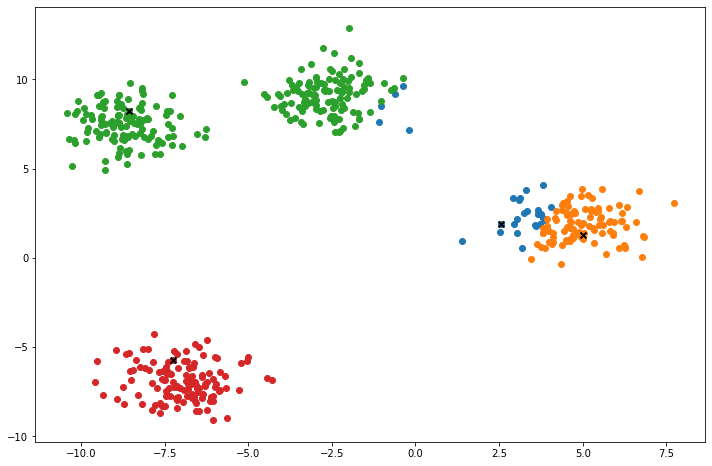

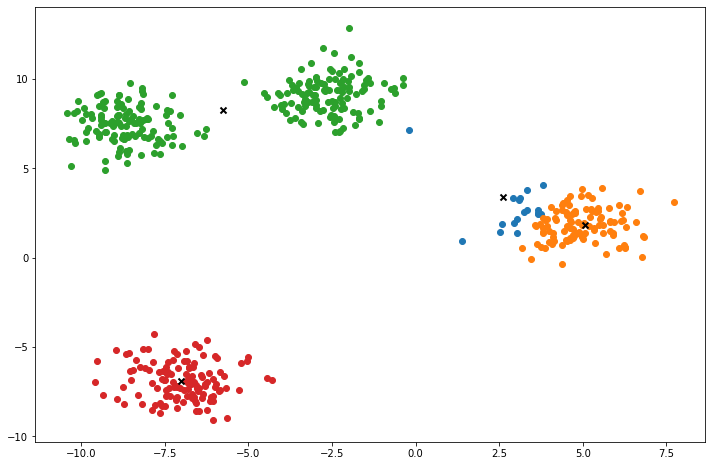

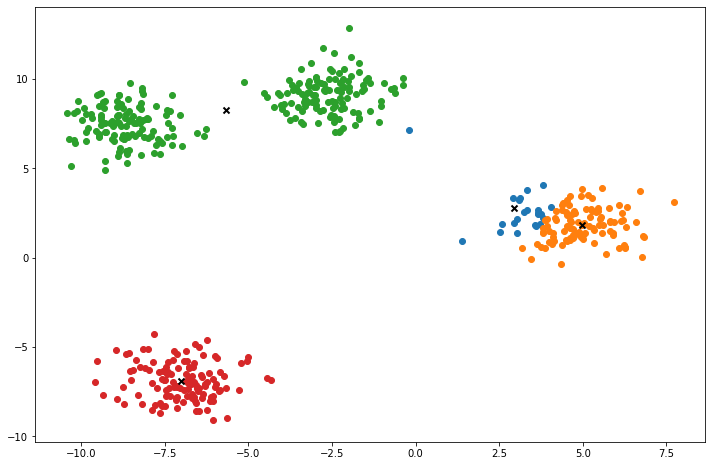

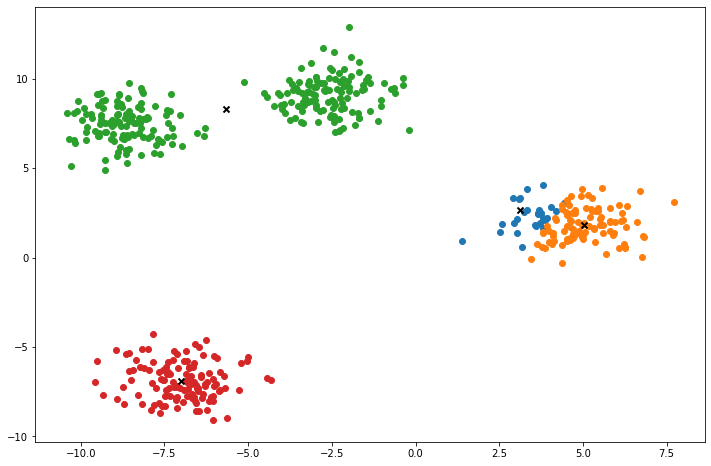

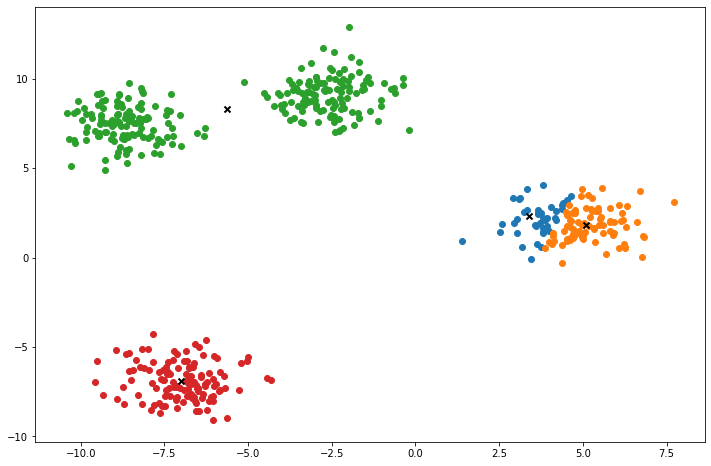

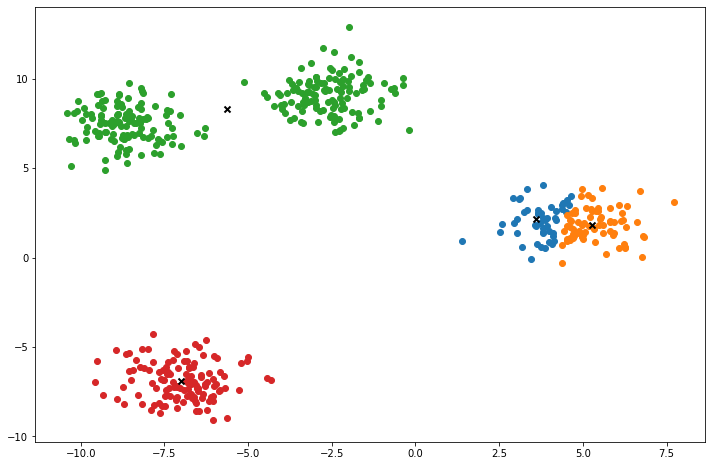

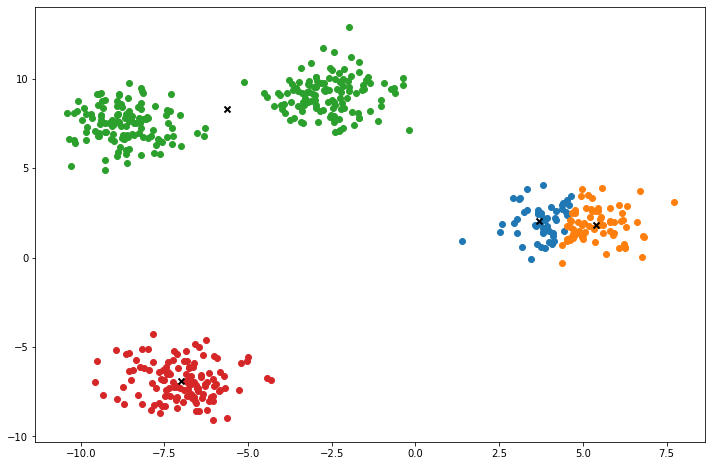

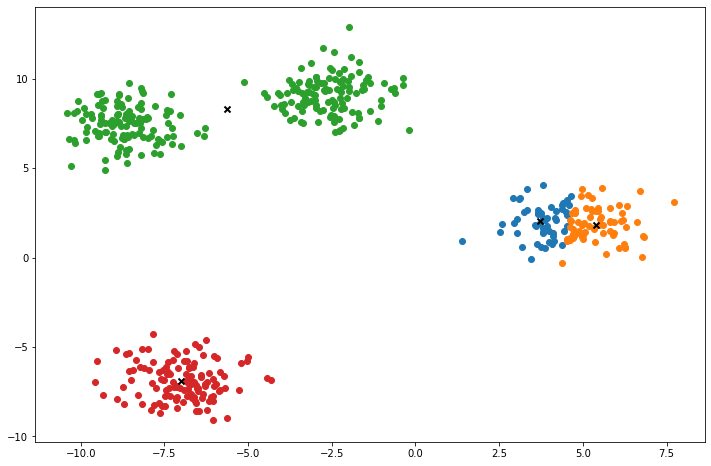

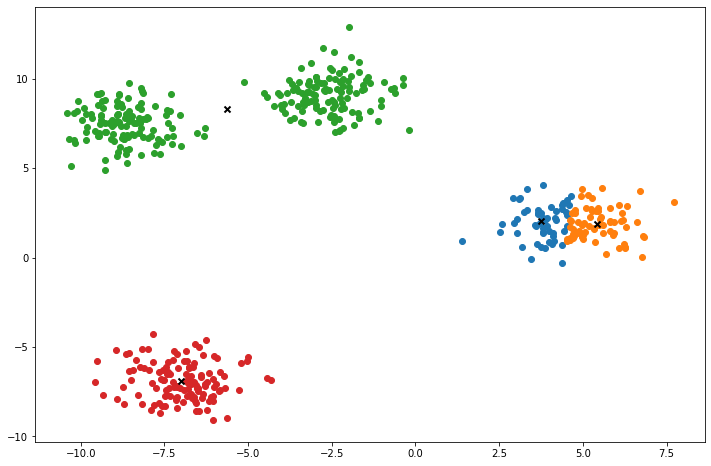

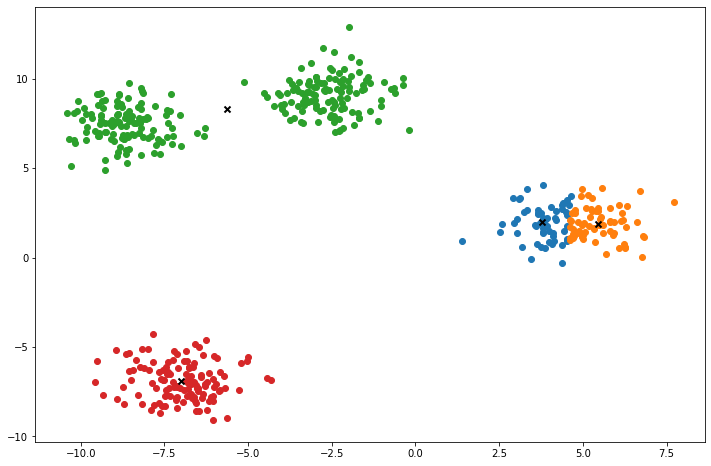

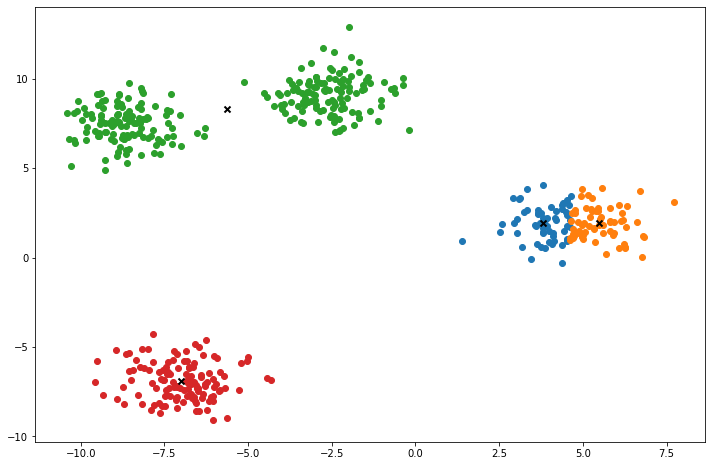

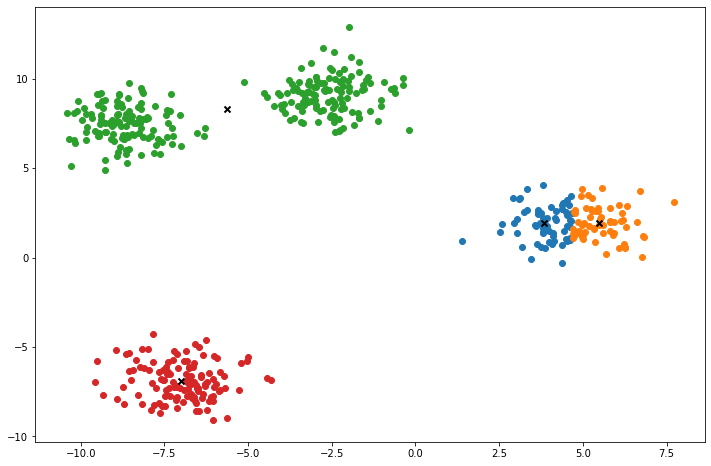

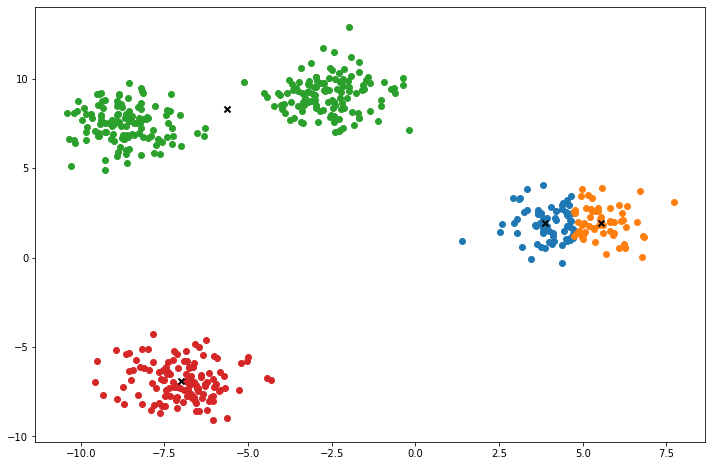

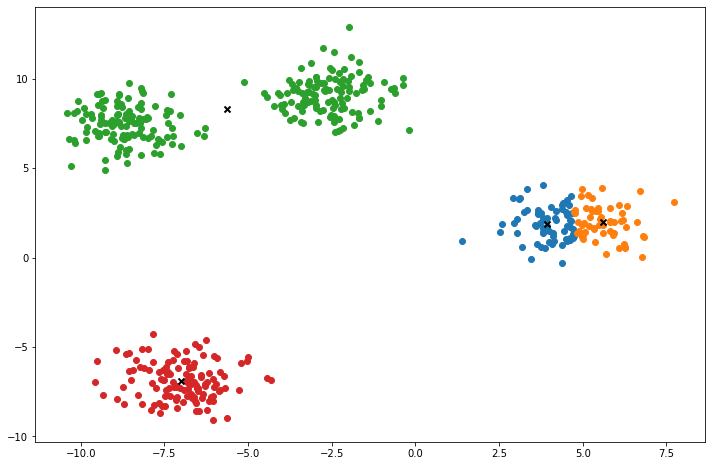

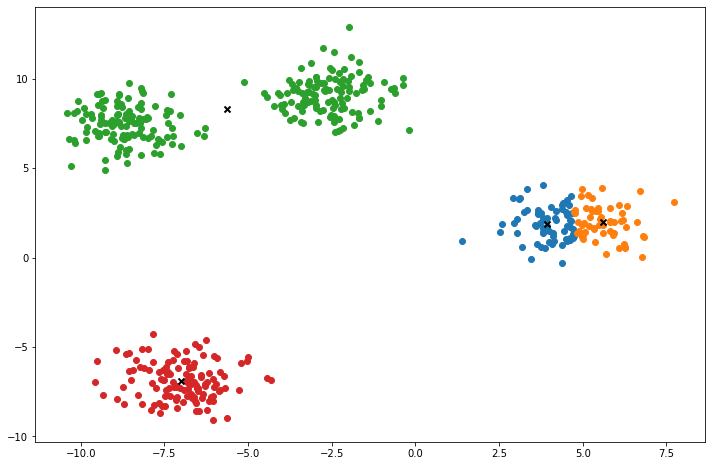

In [50]:
k = KMeans(4, 100, plot_steps = True)
print(k)
y_pred = k.predict(X)

In [51]:
print(y_pred)

[2. 3. 1. 2. 3. 3. 2. 3. 0. 3. 0. 2. 1. 2. 3. 1. 2. 2. 2. 2. 0. 2. 1. 2.
 2. 3. 3. 2. 2. 2. 3. 2. 2. 2. 3. 3. 0. 0. 2. 2. 3. 1. 2. 2. 2. 1. 0. 1.
 3. 2. 3. 2. 2. 3. 1. 2. 2. 2. 3. 2. 2. 2. 3. 2. 0. 3. 3. 2. 0. 3. 0. 3.
 3. 2. 2. 2. 2. 3. 1. 2. 3. 1. 3. 2. 2. 2. 2. 2. 0. 2. 2. 3. 0. 3. 1. 2.
 2. 0. 2. 2. 0. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 3. 0. 2. 3. 3.
 2. 1. 3. 0. 2. 1. 0. 3. 3. 2. 2. 0. 0. 3. 1. 2. 2. 2. 0. 0. 3. 2. 1. 0.
 3. 2. 2. 2. 2. 2. 3. 3. 0. 0. 2. 2. 2. 2. 3. 3. 2. 2. 1. 1. 3. 2. 0. 3.
 2. 2. 3. 2. 2. 2. 2. 2. 2. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 1. 2. 3. 3. 2.
 2. 3. 2. 3. 2. 2. 2. 3. 2. 2. 3. 2. 0. 2. 3. 0. 1. 2. 2. 3. 2. 2. 2. 3.
 2. 2. 2. 1. 0. 2. 2. 2. 0. 2. 2. 3. 3. 0. 3. 0. 2. 3. 2. 3. 2. 3. 1. 0.
 0. 3. 2. 0. 2. 2. 0. 2. 2. 3. 2. 2. 2. 2. 0. 0. 2. 2. 3. 0. 2. 2. 2. 2.
 3. 3. 0. 2. 1. 3. 2. 2. 1. 2. 2. 2. 2. 1. 2. 3. 2. 0. 1. 2. 3. 2. 1. 2.
 0. 3. 3. 2. 2. 1. 2. 0. 2. 0. 3. 1. 3. 2. 1. 0. 2. 1. 3. 3. 0. 1. 3. 2.
 1. 1. 1. 3. 2. 1. 0. 1. 2. 1. 0. 2. 2. 2. 3. 2. 2.